In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Importing necessary libraries/modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pwd

/kaggle/working


In [4]:
pd.set_option('display.max_columns', None)
# to see all the columns

# loading the data

In [5]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
target_column = "SalePrice"
unique_Id_column = "Id"

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling Missing Values

In [8]:
# Didplaying all the columns which are having minimum 50 null values
min_50_null_columns = []
btw_50_100_null_columns = []
for col,nulls in train_df.isna().sum().reset_index().values:
    if nulls > 50:
        print(col, "-->",nulls)
        min_50_null_columns.append(col)
    if nulls > 50 and nulls < 100 :
        btw_50_100_null_columns.append(col)

LotFrontage --> 259
Alley --> 1369
FireplaceQu --> 690
GarageType --> 81
GarageYrBlt --> 81
GarageFinish --> 81
GarageQual --> 81
GarageCond --> 81
PoolQC --> 1453
Fence --> 1179
MiscFeature --> 1406


In [9]:
train_df[min_50_null_columns]

,LotFrontage,Alley,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [10]:
train_df[btw_50_100_null_columns]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...
1455,Attchd,1999.0,RFn,TA,TA
1456,Attchd,1978.0,Unf,TA,TA
1457,Attchd,1941.0,RFn,TA,TA
1458,Attchd,1950.0,Unf,TA,TA


In [11]:
# Dropping features having more than 50 null values and removing the rows where null counts are less
train_df = train_df.drop(columns=min_50_null_columns)
train_df = train_df.dropna()

*For Test data,* 
* since we have to predict all of the record (My assumption), we should not drop them.
* Instead we can handle them by median imputation for numerica and mode imputaion for categorical missing values

In [12]:
for col in test_df.columns:
    if test_df[col].dtype == "object" and test_df[col].isna().any():
        print("Missing value found in ",col)
        test_df[col] = test_df[col].fillna(test_df[col].mode())
        
    elif test_df[col].dtype in ["float64","int64"] and test_df[col].isna().any():
        print("Missing value found in ",col)
        test_df[col] = test_df[col].fillna(test_df[col].mean())

Missing value found in  MSZoning
Missing value found in  LotFrontage
Missing value found in  Alley
Missing value found in  Utilities
Missing value found in  Exterior1st
Missing value found in  Exterior2nd
Missing value found in  MasVnrType
Missing value found in  MasVnrArea
Missing value found in  BsmtQual
Missing value found in  BsmtCond
Missing value found in  BsmtExposure
Missing value found in  BsmtFinType1
Missing value found in  BsmtFinSF1
Missing value found in  BsmtFinType2
Missing value found in  BsmtFinSF2
Missing value found in  BsmtUnfSF
Missing value found in  TotalBsmtSF
Missing value found in  BsmtFullBath
Missing value found in  BsmtHalfBath
Missing value found in  KitchenQual
Missing value found in  Functional
Missing value found in  FireplaceQu
Missing value found in  GarageType
Missing value found in  GarageYrBlt
Missing value found in  GarageFinish
Missing value found in  GarageCars
Missing value found in  GarageArea
Missing value found in  GarageQual
Missing value 

# Exploaring Numerical Data

In [13]:
# checking outliers
numeric_data = train_df.select_dtypes(include='number')
numeric_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125


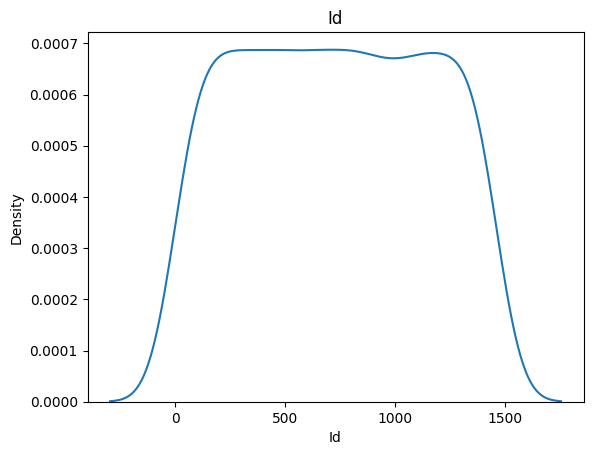

Id
.<-----------------------------value counts-------------------------------->
1       1
911     1
979     1
977     1
976     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1412, dtype: int64
|
|upper limit:  2198.5
|lower limit:  -735.5
|IQR: 733.5
|median 727.5
|total count: 1412
`---------------------------------------------------------------------------->'



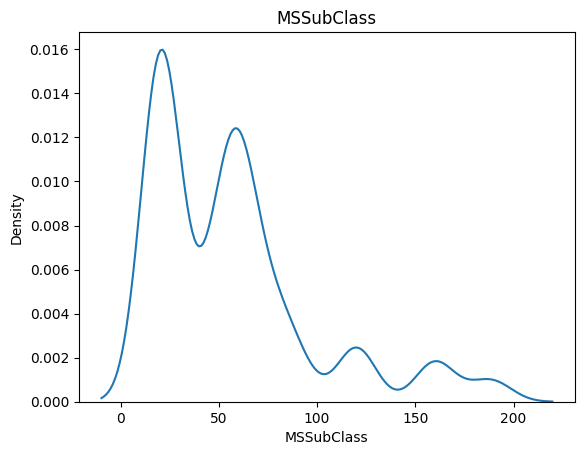

MSSubClass
.<-----------------------------value counts-------------------------------->
20     515
60     294
50     141
120     86
30      69
160     63
70      60
80      57
90      38
190     28
85      19
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
|
|upper limit:  145.0
|lower limit:  -55.0
|IQR: 50.0
|median 50.0
|total count: 1412
`---------------------------------------------------------------------------->'



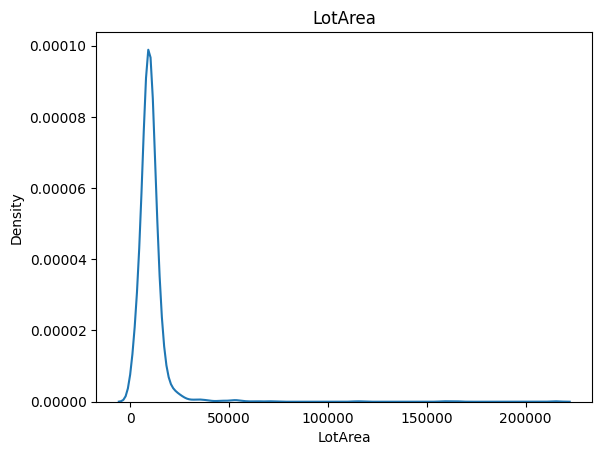

LotArea
.<-----------------------------value counts-------------------------------->
9600     24
7200     20
6000     17
9000     14
10800    13
         ..
12735     1
11553     1
11423     1
14601     1
9717      1
Name: LotArea, Length: 1050, dtype: int64
|
|upper limit:  17686.5
|lower limit:  1504.5
|IQR: 4045.5
|median 9500.0
|total count: 1412
`---------------------------------------------------------------------------->'



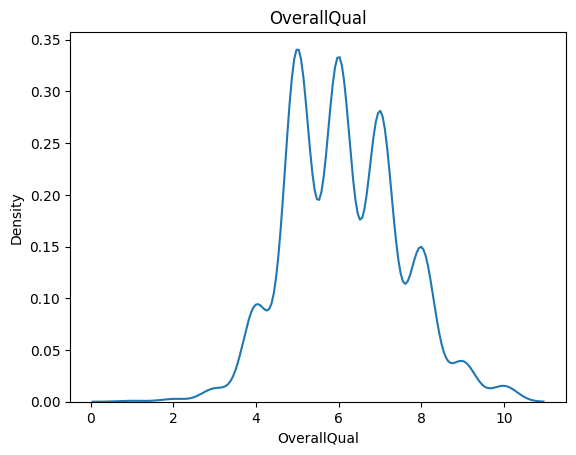

OverallQual
.<-----------------------------value counts-------------------------------->
5     381
6     371
7     313
8     166
4     103
9      43
10     17
3      14
2       3
1       1
Name: OverallQual, dtype: int64
|
|upper limit:  10.0
|lower limit:  2.0
|IQR: 2.0
|median 6.0
|total count: 1412
`---------------------------------------------------------------------------->'



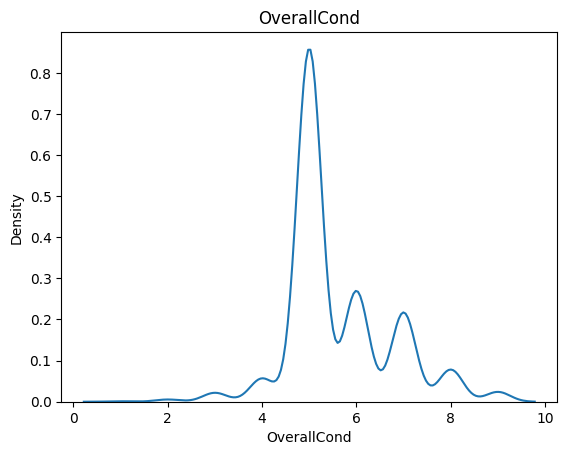

OverallCond
.<-----------------------------value counts-------------------------------->
5    792
6    248
7    200
8     72
4     52
9     22
3     20
2      5
1      1
Name: OverallCond, dtype: int64
|
|upper limit:  7.5
|lower limit:  3.5
|IQR: 1.0
|median 5.0
|total count: 1412
`---------------------------------------------------------------------------->'



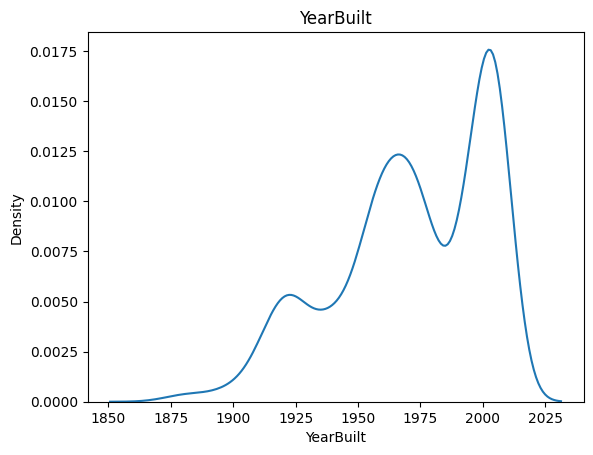

YearBuilt
.<-----------------------------value counts-------------------------------->
2005    64
2006    64
2004    54
2007    47
2003    42
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64
|
|upper limit:  2069.625
|lower limit:  1884.625
|IQR: 46.25
|median 1973.0
|total count: 1412
`---------------------------------------------------------------------------->'



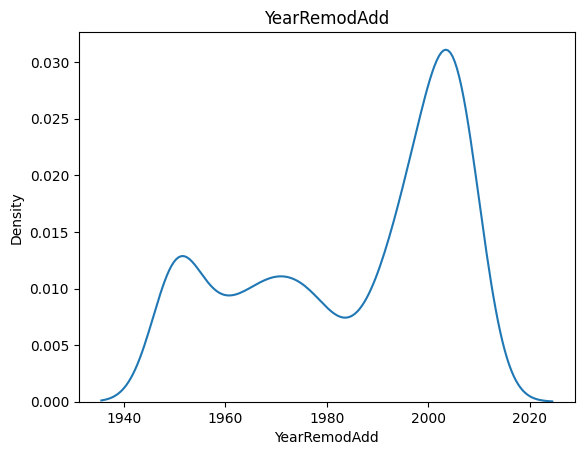

YearRemodAdd
.<-----------------------------value counts-------------------------------->
1950    165
2006     93
2005     73
2007     72
2004     61
       ... 
2010      6
1986      5
1983      5
1952      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
|
|upper limit:  2058.0
|lower limit:  1914.0
|IQR: 36.0
|median 1994.0
|total count: 1412
`---------------------------------------------------------------------------->'



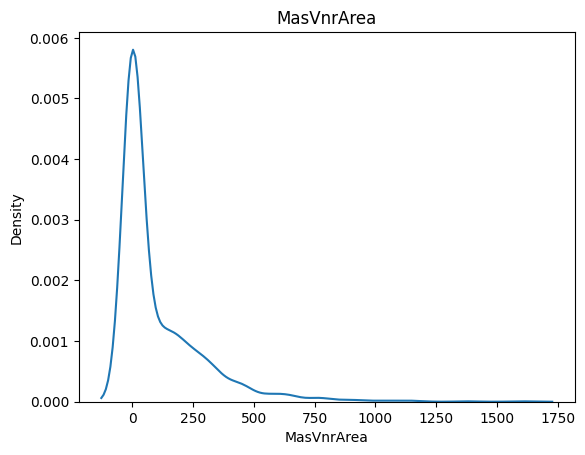

MasVnrArea
.<-----------------------------value counts-------------------------------->
0.0      828
72.0       8
108.0      8
180.0      8
120.0      7
        ... 
89.0       1
333.0      1
762.0      1
594.0      1
119.0      1
Name: MasVnrArea, Length: 325, dtype: int64
|
|upper limit:  420.0
|lower limit:  -252.0
|IQR: 168.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



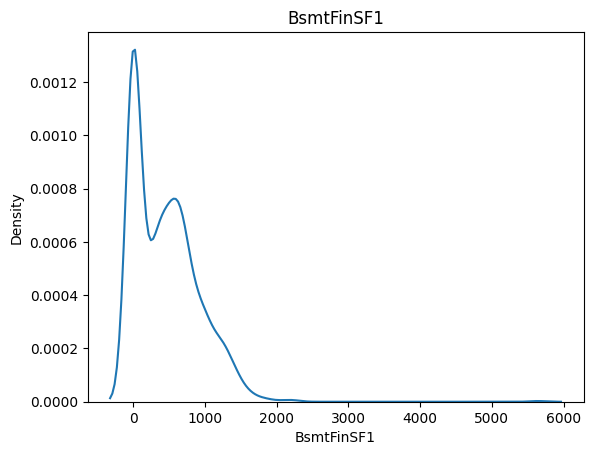

BsmtFinSF1
.<-----------------------------value counts-------------------------------->
0      426
24      12
16       9
936      5
20       5
      ... 
515      1
607      1
897      1
299      1
830      1
Name: BsmtFinSF1, Length: 632, dtype: int64
|
|upper limit:  1798.125
|lower limit:  -1078.875
|IQR: 719.25
|median 399.0
|total count: 1412
`---------------------------------------------------------------------------->'



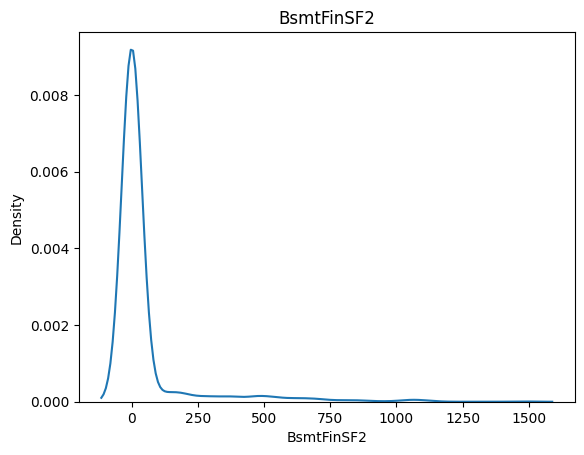

BsmtFinSF2
.<-----------------------------value counts-------------------------------->
0       1246
180        5
374        3
551        2
147        2
        ... 
169        1
532        1
165        1
1120       1
1029       1
Name: BsmtFinSF2, Length: 143, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



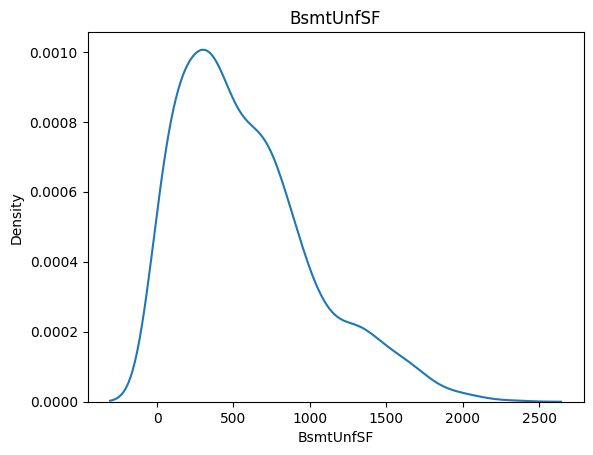

BsmtUnfSF
.<-----------------------------value counts-------------------------------->
0       81
728      9
384      7
572      7
600      7
        ..
551      1
1257     1
605      1
467      1
136      1
Name: BsmtUnfSF, Length: 776, dtype: int64
|
|upper limit:  1662.625
|lower limit:  -602.375
|IQR: 566.25
|median 490.0
|total count: 1412
`---------------------------------------------------------------------------->'



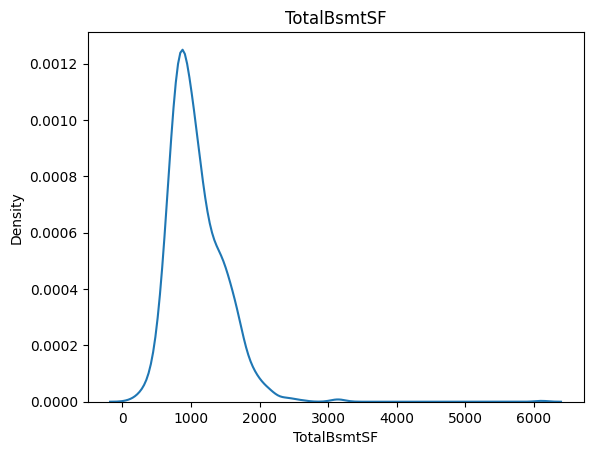

TotalBsmtSF
.<-----------------------------value counts-------------------------------->
864     35
672     17
912     15
1040    14
816     13
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 715, dtype: int64
|
|upper limit:  2052.625
|lower limit:  63.625
|IQR: 497.25
|median 1004.0
|total count: 1412
`---------------------------------------------------------------------------->'



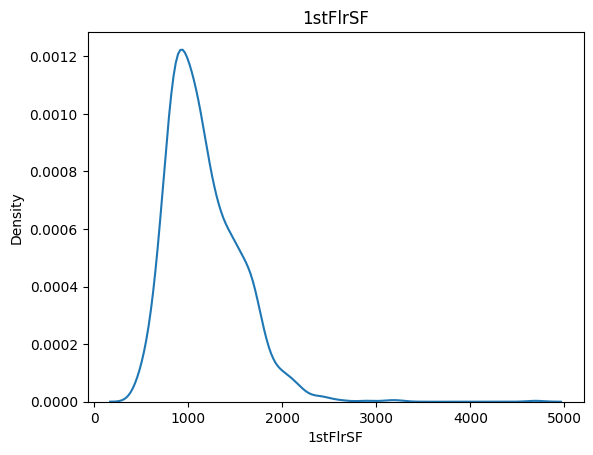

1stFlrSF
.<-----------------------------value counts-------------------------------->
864     25
912     14
894     12
848     12
1040    10
        ..
1218     1
1801     1
899      1
3228     1
1256     1
Name: 1stFlrSF, Length: 739, dtype: int64
|
|upper limit:  2157.0
|lower limit:  117.0
|IQR: 510.0
|median 1086.0
|total count: 1412
`---------------------------------------------------------------------------->'



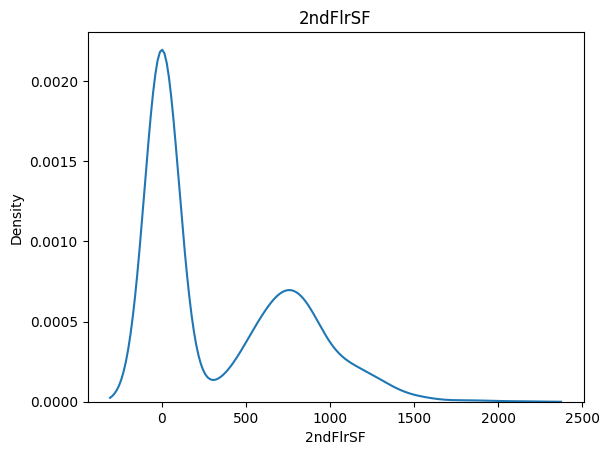

2ndFlrSF
.<-----------------------------value counts-------------------------------->
0       796
728      10
504       9
672       8
546       8
       ... 
1015      1
1538      1
914       1
1067      1
1152      1
Name: 2ndFlrSF, Length: 410, dtype: int64
|
|upper limit:  1826.25
|lower limit:  -1095.75
|IQR: 730.5
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



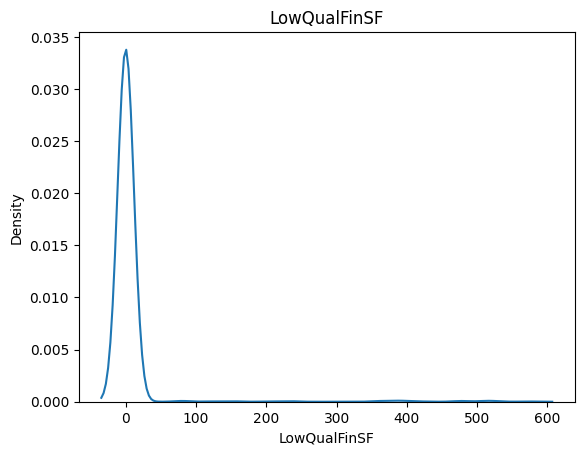

LowQualFinSF
.<-----------------------------value counts-------------------------------->
0      1387
80        3
360       2
156       1
205       1
479       1
397       1
514       1
120       1
481       1
232       1
515       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



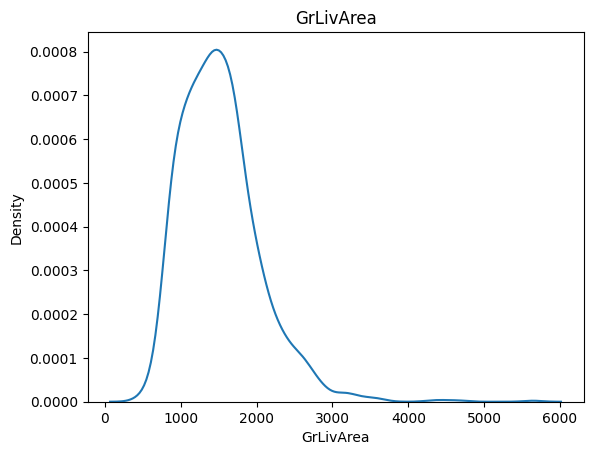

GrLivArea
.<-----------------------------value counts-------------------------------->
864     22
894     11
1456    10
848     10
1200     8
        ..
1960     1
1911     1
1378     1
1041     1
1256     1
Name: GrLivArea, Length: 850, dtype: int64
|
|upper limit:  2757.625
|lower limit:  162.625
|IQR: 648.75
|median 1467.0
|total count: 1412
`---------------------------------------------------------------------------->'



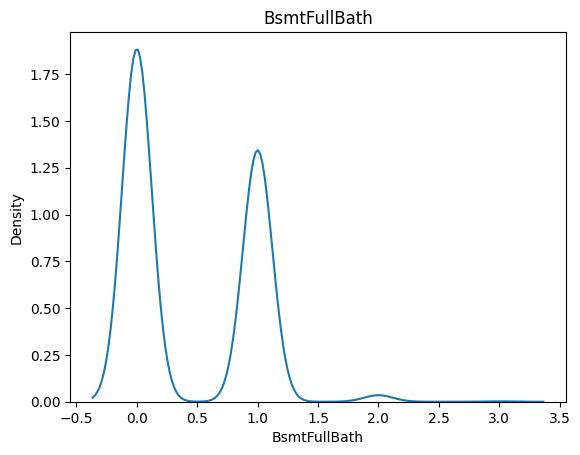

BsmtFullBath
.<-----------------------------value counts-------------------------------->
0    815
1    581
2     15
3      1
Name: BsmtFullBath, dtype: int64
|
|upper limit:  2.5
|lower limit:  -1.5
|IQR: 1.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



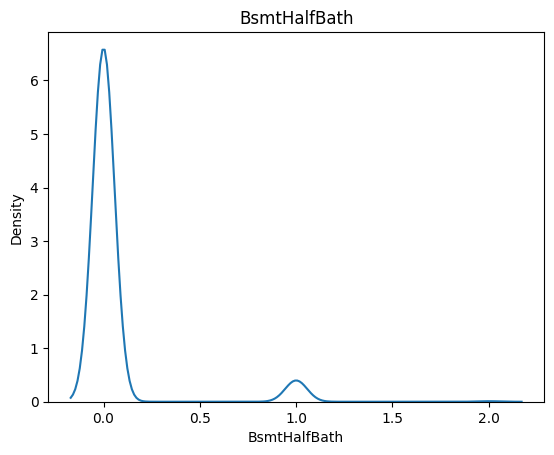

BsmtHalfBath
.<-----------------------------value counts-------------------------------->
0    1330
1      80
2       2
Name: BsmtHalfBath, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



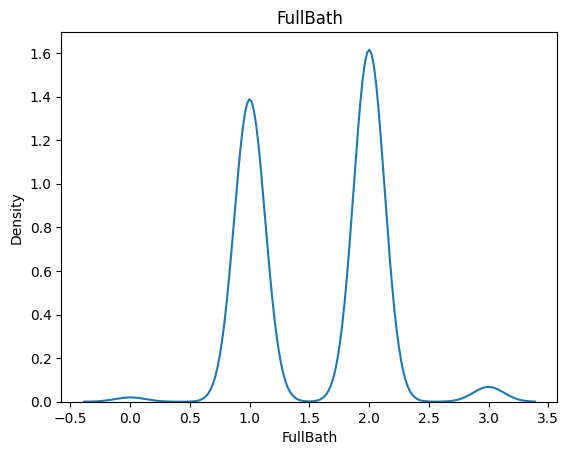

FullBath
.<-----------------------------value counts-------------------------------->
2    738
1    634
3     31
0      9
Name: FullBath, dtype: int64
|
|upper limit:  3.5
|lower limit:  -0.5
|IQR: 1.0
|median 2.0
|total count: 1412
`---------------------------------------------------------------------------->'



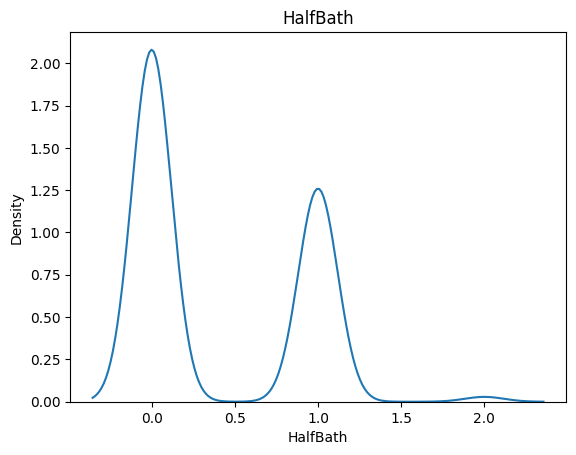

HalfBath
.<-----------------------------value counts-------------------------------->
0    872
1    528
2     12
Name: HalfBath, dtype: int64
|
|upper limit:  2.5
|lower limit:  -1.5
|IQR: 1.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



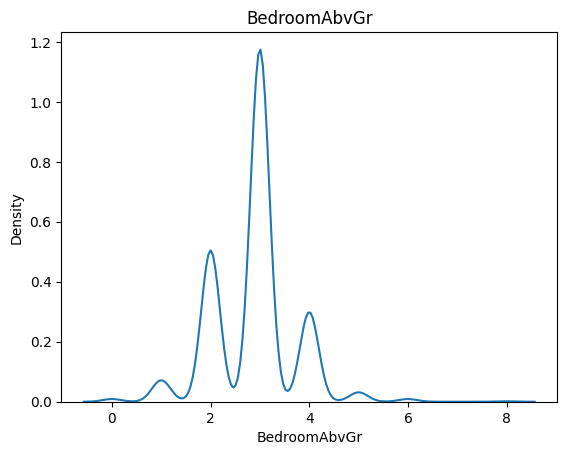

BedroomAbvGr
.<-----------------------------value counts-------------------------------->
3    790
2    339
4    201
1     48
5     21
0      6
6      6
8      1
Name: BedroomAbvGr, dtype: int64
|
|upper limit:  4.5
|lower limit:  0.5
|IQR: 1.0
|median 3.0
|total count: 1412
`---------------------------------------------------------------------------->'



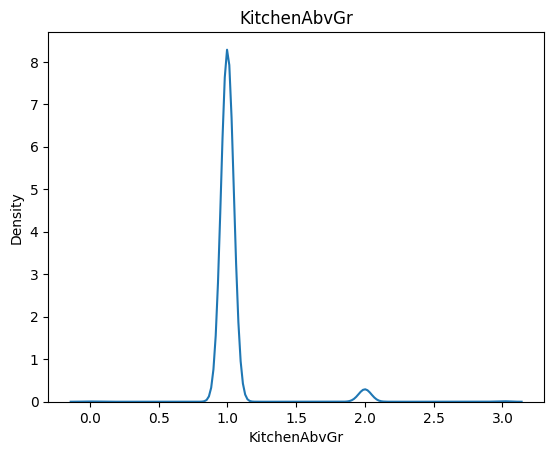

KitchenAbvGr
.<-----------------------------value counts-------------------------------->
1    1361
2      48
3       2
0       1
Name: KitchenAbvGr, dtype: int64
|
|upper limit:  1.0
|lower limit:  1.0
|IQR: 0.0
|median 1.0
|total count: 1412
`---------------------------------------------------------------------------->'



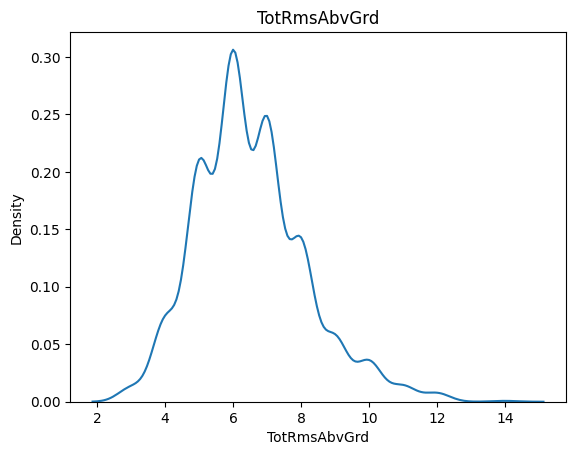

TotRmsAbvGrd
.<-----------------------------value counts-------------------------------->
6     393
7     316
5     268
8     180
4      92
9      72
10     46
11     18
3      16
12     10
14      1
Name: TotRmsAbvGrd, dtype: int64
|
|upper limit:  10.0
|lower limit:  2.0
|IQR: 2.0
|median 6.0
|total count: 1412
`---------------------------------------------------------------------------->'



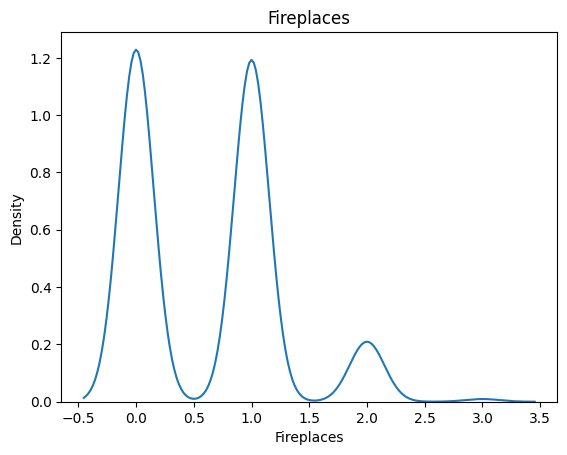

Fireplaces
.<-----------------------------value counts-------------------------------->
0    657
1    638
2    112
3      5
Name: Fireplaces, dtype: int64
|
|upper limit:  2.5
|lower limit:  -1.5
|IQR: 1.0
|median 1.0
|total count: 1412
`---------------------------------------------------------------------------->'



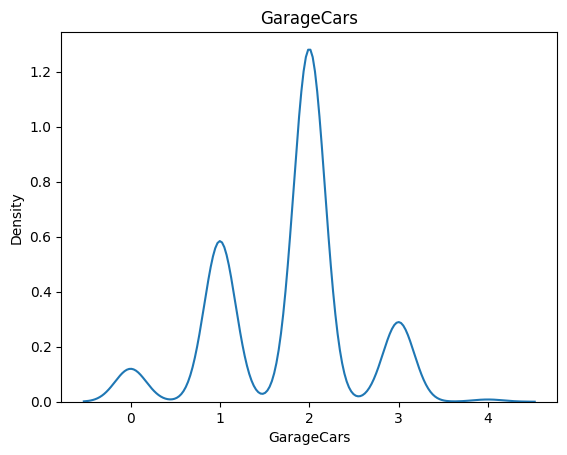

GarageCars
.<-----------------------------value counts-------------------------------->
2    793
1    361
3    179
0     74
4      5
Name: GarageCars, dtype: int64
|
|upper limit:  3.5
|lower limit:  -0.5
|IQR: 1.0
|median 2.0
|total count: 1412
`---------------------------------------------------------------------------->'



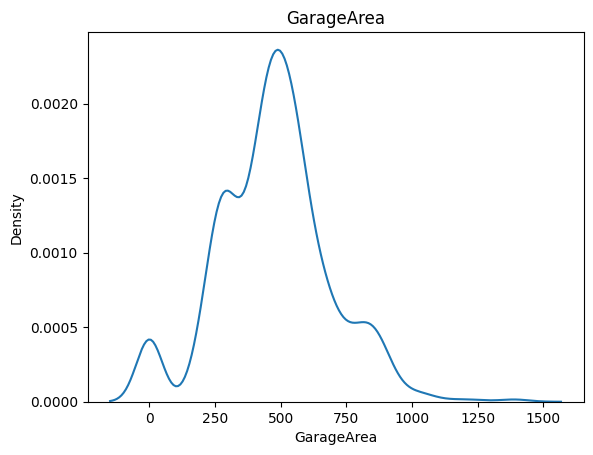

GarageArea
.<-----------------------------value counts-------------------------------->
0      74
440    48
576    47
240    37
484    33
       ..
318     1
320     1
435     1
831     1
192     1
Name: GarageArea, Length: 436, dtype: int64
|
|upper limit:  936.0
|lower limit:  -24.0
|IQR: 240.0
|median 480.0
|total count: 1412
`---------------------------------------------------------------------------->'



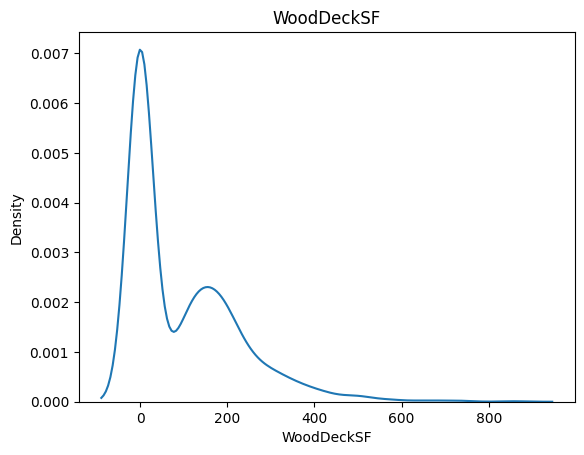

WoodDeckSF
.<-----------------------------value counts-------------------------------->
0      723
192     38
100     35
144     32
120     30
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 273, dtype: int64
|
|upper limit:  420.0
|lower limit:  -252.0
|IQR: 168.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



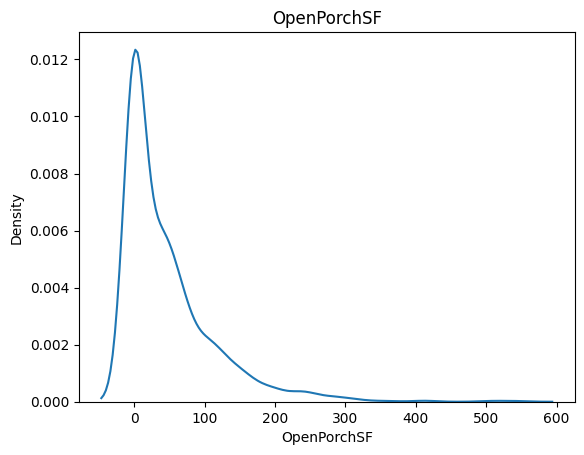

OpenPorchSF
.<-----------------------------value counts-------------------------------->
0      623
36      28
20      21
48      21
40      19
      ... 
176      1
133      1
85       1
187      1
41       1
Name: OpenPorchSF, Length: 201, dtype: int64
|
|upper limit:  172.5
|lower limit:  -103.5
|IQR: 69.0
|median 26.0
|total count: 1412
`---------------------------------------------------------------------------->'



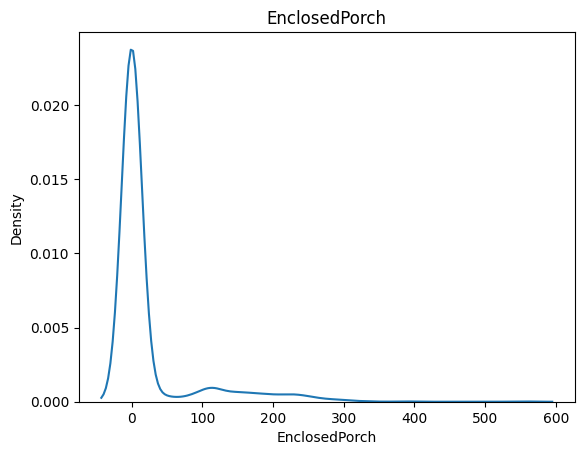

EnclosedPorch
.<-----------------------------value counts-------------------------------->
0      1209
112      15
96        6
216       5
120       5
       ... 
293       1
189       1
54        1
136       1
99        1
Name: EnclosedPorch, Length: 117, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



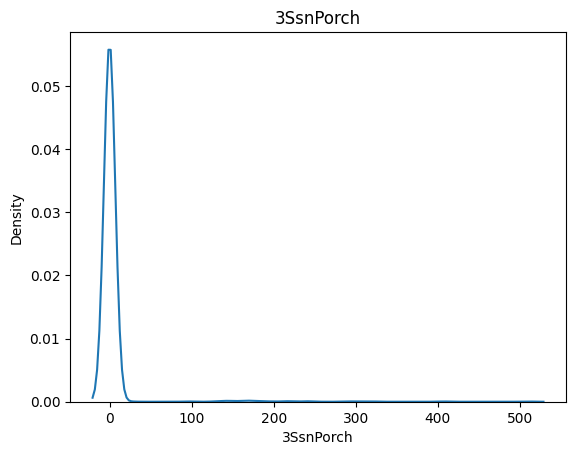

3SsnPorch
.<-----------------------------value counts-------------------------------->
0      1389
168       3
144       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
180       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



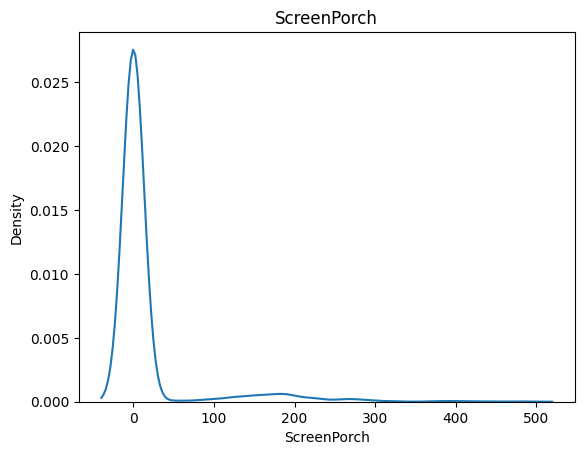

ScreenPorch
.<-----------------------------value counts-------------------------------->
0      1296
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



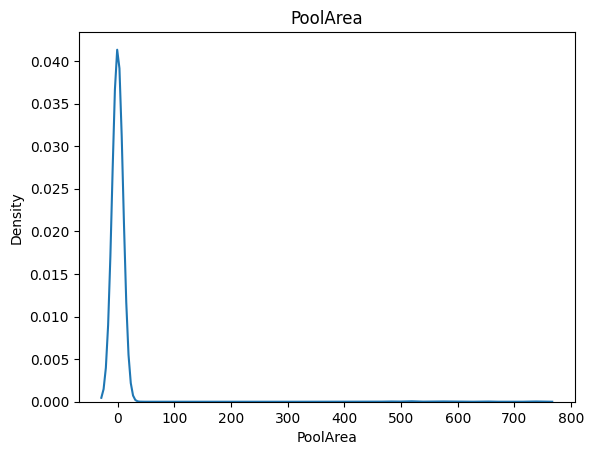

PoolArea
.<-----------------------------value counts-------------------------------->
0      1405
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



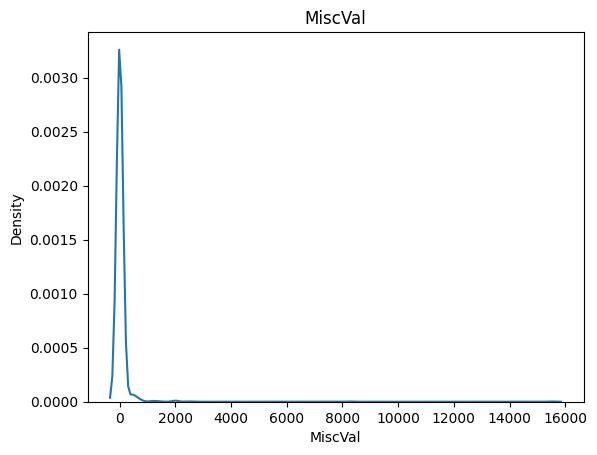

MiscVal
.<-----------------------------value counts-------------------------------->
0        1363
400        11
500         7
700         5
2000        4
600         4
450         4
480         2
15500       1
800         1
350         1
1300        1
1200        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
|
|upper limit:  0.0
|lower limit:  0.0
|IQR: 0.0
|median 0.0
|total count: 1412
`---------------------------------------------------------------------------->'



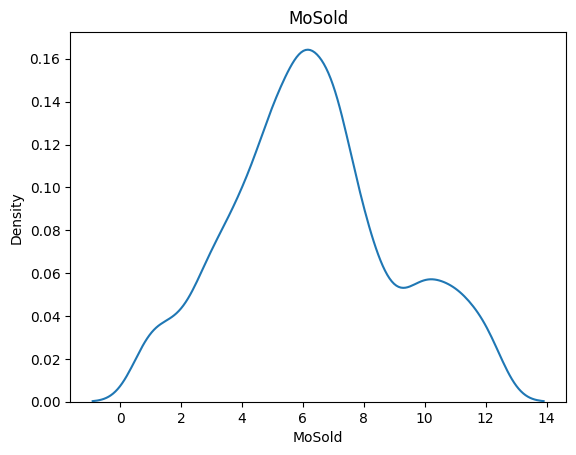

MoSold
.<-----------------------------value counts-------------------------------->
6     244
7     224
5     197
4     136
8     119
3     103
10     86
11     77
9      62
12     57
1      56
2      51
Name: MoSold, dtype: int64
|
|upper limit:  12.5
|lower limit:  0.5
|IQR: 3.0
|median 6.0
|total count: 1412
`---------------------------------------------------------------------------->'



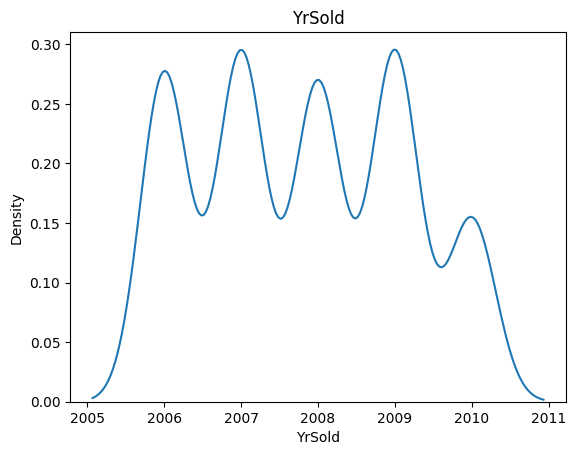

YrSold
.<-----------------------------value counts-------------------------------->
2009    323
2007    322
2006    304
2008    294
2010    169
Name: YrSold, dtype: int64
|
|upper limit:  2012.0
|lower limit:  2004.0
|IQR: 2.0
|median 2008.0
|total count: 1412
`---------------------------------------------------------------------------->'



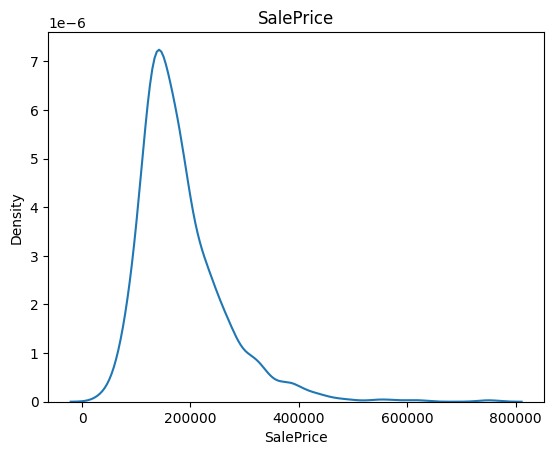

SalePrice
.<-----------------------------value counts-------------------------------->
140000    20
135000    17
145000    14
155000    14
190000    13
          ..
208300     1
289000     1
181500     1
430000     1
147500     1
Name: SalePrice, Length: 641, dtype: int64
|
|upper limit:  340287.5
|lower limit:  6187.5
|IQR: 83525.0
|median 164600.0
|total count: 1412
`---------------------------------------------------------------------------->'



In [14]:
for col in numeric_data.columns:
#     plt.Figure((30,16))
    
#     plt.subplot(1,2,1)
#     plt.boxplot(col,data=numeric_data)   
#     plt.title(col)
#     plt.show()
    
#     plt.subplot(1,2,2)
    sns.kdeplot(data=numeric_data, x=col) 
    plt.title(col)
    plt.show()
    
    print(f"{col}")
    print(".<-----------------------------value counts-------------------------------->")
    print(numeric_data[col].value_counts())
    print("|")
    
    Q1 = np.percentile(numeric_data[col],25)
    Q3 = np.percentile(numeric_data[col],75)
    IQR = Q3-Q1
    
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    print("|upper limit: ",upper)
    print("|lower limit: ",lower)
    print("|IQR:",IQR)
    print("|median", np.median(numeric_data[col]))
    print("|total count:",len(numeric_data))
    print("`---------------------------------------------------------------------------->'")
    print()

#### Lets handle constant columns

In [15]:
!pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 2.2 MB/s eta 0:00:00


In [16]:
# Lets remove constant columns
from fast_ml.feature_selection import get_constant_features
constant_features = get_constant_features(numeric_data, threshold=0.50)
constant_features

,Desc,Var,Value,Perc
0,Quasi Constant,PoolArea,0.0,99.504249
1,Quasi Constant,3SsnPorch,0.0,98.371105
2,Quasi Constant,LowQualFinSF,0.0,98.229462
3,Quasi Constant,MiscVal,0.0,96.529745
4,Quasi Constant,KitchenAbvGr,1.0,96.388102
5,Quasi Constant,BsmtHalfBath,0.0,94.192635
6,Quasi Constant,ScreenPorch,0.0,91.784703
7,Quasi Constant,BsmtFinSF2,0.0,88.243626
8,Quasi Constant,EnclosedPorch,0.0,85.623229
9,Quasi Constant,HalfBath,0.0,61.756374


#### Lets remove constant columns

In [17]:
constant_columns = constant_features['Var'].to_list()

train_df = train_df.drop(columns=constant_columns)
numeric_data = numeric_data.drop(columns=constant_columns)

train_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageArea,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,1710,Gd,8,Typ,0,548,Y,61,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,1262,TA,6,Typ,1,460,Y,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,1786,Gd,6,Typ,1,608,Y,42,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,1717,Gd,7,Typ,1,642,Y,35,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,2198,Gd,9,Typ,1,836,Y,84,12,2008,WD,Normal,250000


In [18]:
train_df.shape

(1412, 52)

#### lets impute/remove outliers

In [19]:
for col in numeric_data.columns:    
    Q1 = np.percentile(numeric_data[col],25)
    Q3 = np.percentile(numeric_data[col],75)
    IQR = Q3-Q1
    
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    
    numeric_data[col] = numeric_data[col].apply(lambda x: x if (x<=upper and x>=lower) else np.nan)
    train_df[col] = train_df[col].apply(lambda x: x if (x<=upper and x>=lower) else np.nan)
    
numeric_data = numeric_data.dropna(axis=0)
train_df = train_df.dropna(axis=0)

print(numeric_data.shape)
print(train_df.shape)

numeric_data.head()
   

(1092, 18)
(1092, 52)


,Id,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60.0,8450.0,7.0,2003.0,2003,706.0,150.0,856.0,856.0,1710.0,8.0,0.0,548.0,61.0,2,2008,208500.0
1,2,20.0,9600.0,6.0,1976.0,1976,978.0,284.0,1262.0,1262.0,1262.0,6.0,1.0,460.0,0.0,5,2007,181500.0
2,3,60.0,11250.0,7.0,2001.0,2002,486.0,434.0,920.0,920.0,1786.0,6.0,1.0,608.0,42.0,9,2008,223500.0
3,4,70.0,9550.0,7.0,1915.0,1970,216.0,540.0,756.0,961.0,1717.0,7.0,1.0,642.0,35.0,2,2006,140000.0
4,5,60.0,14260.0,8.0,2000.0,2000,655.0,490.0,1145.0,1145.0,2198.0,9.0,1.0,836.0,84.0,12,2008,250000.0


In [20]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageArea', 'PavedDrive',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [21]:
columns_to_drop = [unique_Id_column]
numeric_data = numeric_data.drop(columns_to_drop, axis=1)
train_df = train_df.drop(columns_to_drop, axis=1)

# Exploaring Categorical Data

In [22]:
categorica_df = train_df.select_dtypes(include=object)
categorica_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Y,WD,Normal


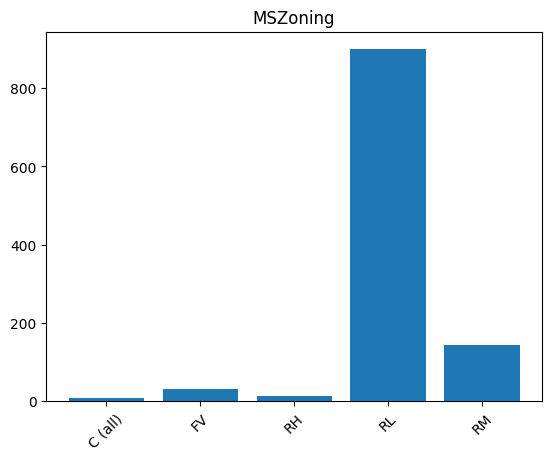

MSZoning
.<-----------------------------value counts-------------------------------->
RL         0.823260
RM         0.131868
FV         0.027473
RH         0.010989
C (all)    0.006410
Name: MSZoning, dtype: float64
`<------------------------------------------------------------------------->





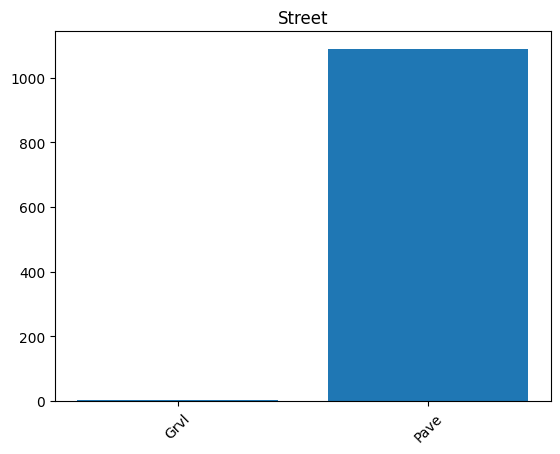

Street
.<-----------------------------value counts-------------------------------->
Pave    0.997253
Grvl    0.002747
Name: Street, dtype: float64
`<------------------------------------------------------------------------->





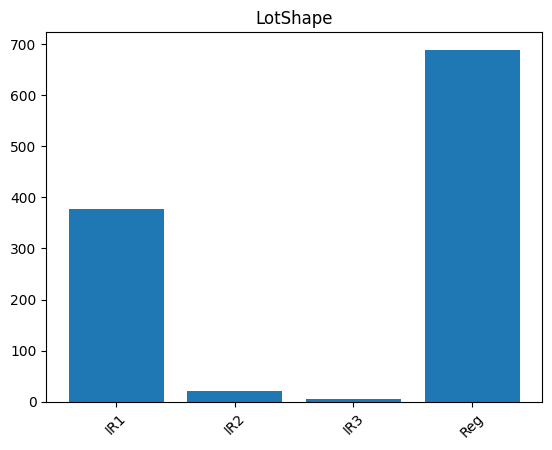

LotShape
.<-----------------------------value counts-------------------------------->
Reg    0.630952
IR1    0.345238
IR2    0.019231
IR3    0.004579
Name: LotShape, dtype: float64
`<------------------------------------------------------------------------->





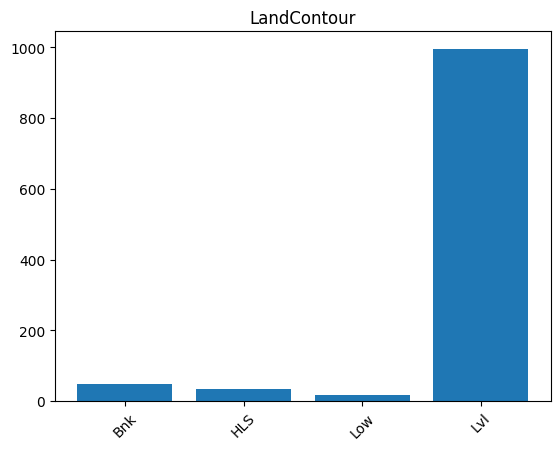

LandContour
.<-----------------------------value counts-------------------------------->
Lvl    0.911172
Bnk    0.043040
HLS    0.030220
Low    0.015568
Name: LandContour, dtype: float64
`<------------------------------------------------------------------------->





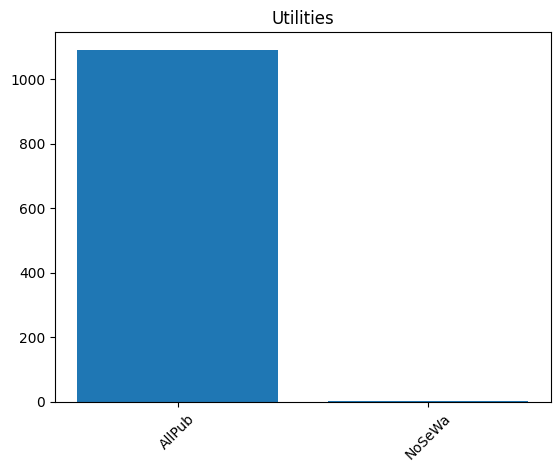

Utilities
.<-----------------------------value counts-------------------------------->
AllPub    0.999084
NoSeWa    0.000916
Name: Utilities, dtype: float64
`<------------------------------------------------------------------------->





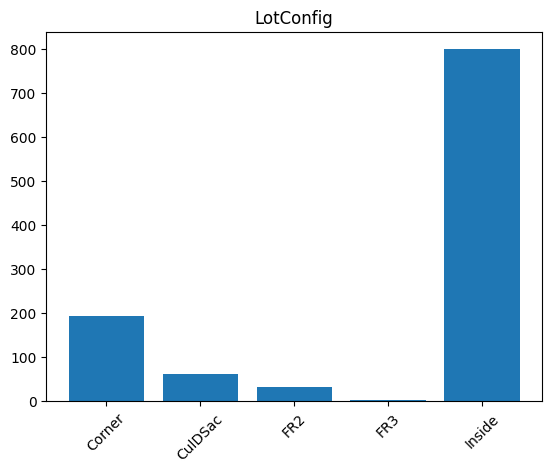

LotConfig
.<-----------------------------value counts-------------------------------->
Inside     0.732601
Corner     0.177656
CulDSac    0.056777
FR2        0.030220
FR3        0.002747
Name: LotConfig, dtype: float64
`<------------------------------------------------------------------------->





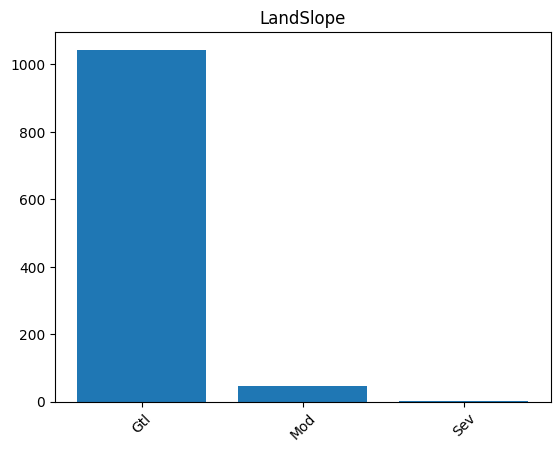

LandSlope
.<-----------------------------value counts-------------------------------->
Gtl    0.956044
Mod    0.042125
Sev    0.001832
Name: LandSlope, dtype: float64
`<------------------------------------------------------------------------->





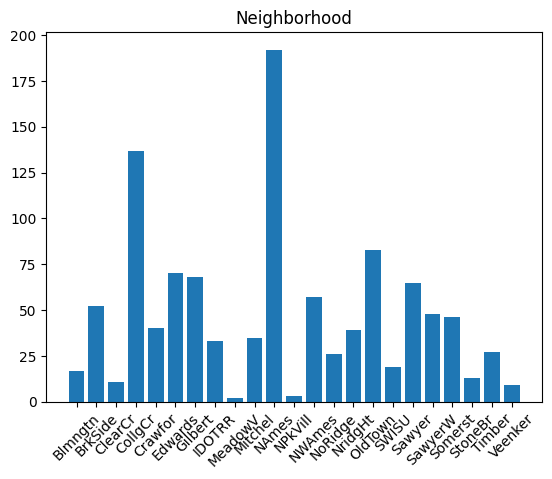

Neighborhood
.<-----------------------------value counts-------------------------------->
NAmes      0.175824
CollgCr    0.125458
OldTown    0.076007
Edwards    0.064103
Gilbert    0.062271
Sawyer     0.059524
NWAmes     0.052198
BrkSide    0.047619
SawyerW    0.043956
Somerst    0.042125
Crawfor    0.036630
NridgHt    0.035714
Mitchel    0.032051
IDOTRR     0.030220
Timber     0.024725
NoRidge    0.023810
SWISU      0.017399
Blmngtn    0.015568
StoneBr    0.011905
ClearCr    0.010073
Veenker    0.008242
NPkVill    0.002747
MeadowV    0.001832
Name: Neighborhood, dtype: float64
`<------------------------------------------------------------------------->





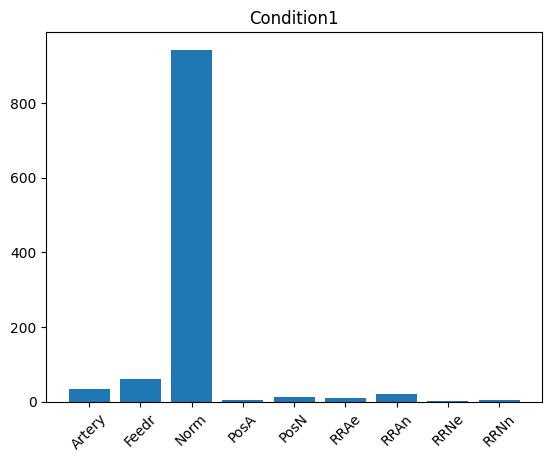

Condition1
.<-----------------------------value counts-------------------------------->
Norm      0.863553
Feedr     0.056777
Artery    0.032051
RRAn      0.018315
PosN      0.010989
RRAe      0.009158
RRNn      0.003663
PosA      0.003663
RRNe      0.001832
Name: Condition1, dtype: float64
`<------------------------------------------------------------------------->





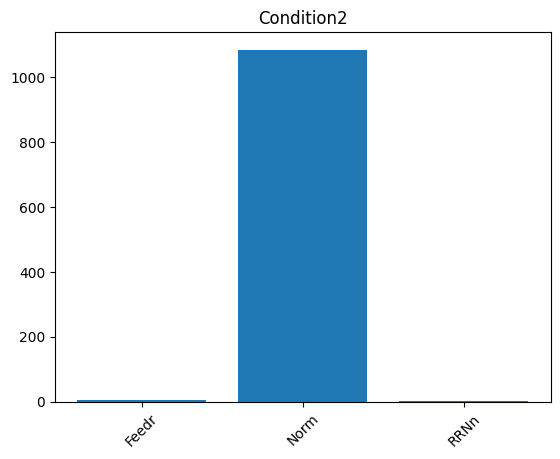

Condition2
.<-----------------------------value counts-------------------------------->
Norm     0.992674
Feedr    0.005495
RRNn     0.001832
Name: Condition2, dtype: float64
`<------------------------------------------------------------------------->





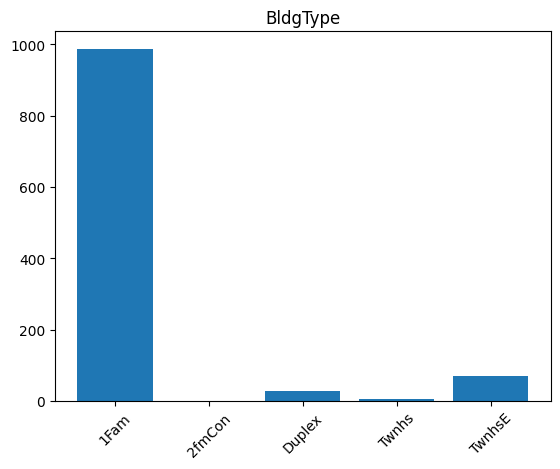

BldgType
.<-----------------------------value counts-------------------------------->
1Fam      0.903846
TwnhsE    0.064103
Duplex    0.026557
Twnhs     0.004579
2fmCon    0.000916
Name: BldgType, dtype: float64
`<------------------------------------------------------------------------->





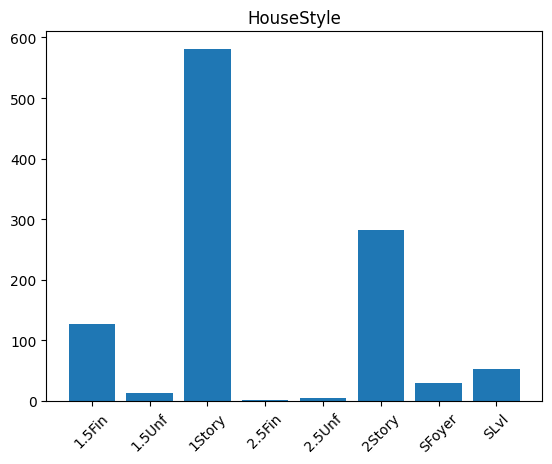

HouseStyle
.<-----------------------------value counts-------------------------------->
1Story    0.532051
2Story    0.259158
1.5Fin    0.116300
SLvl      0.048535
SFoyer    0.026557
1.5Unf    0.011905
2.5Unf    0.004579
2.5Fin    0.000916
Name: HouseStyle, dtype: float64
`<------------------------------------------------------------------------->





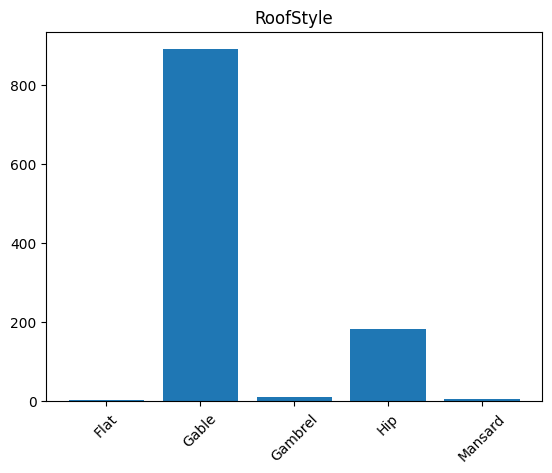

RoofStyle
.<-----------------------------value counts-------------------------------->
Gable      0.815018
Hip        0.167582
Gambrel    0.010073
Mansard    0.004579
Flat       0.002747
Name: RoofStyle, dtype: float64
`<------------------------------------------------------------------------->





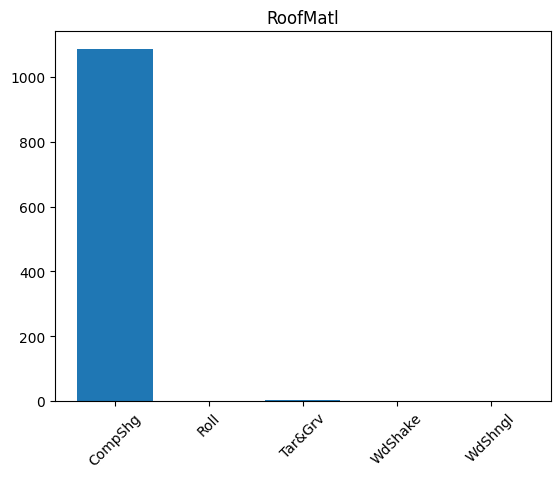

RoofMatl
.<-----------------------------value counts-------------------------------->
CompShg    0.994505
Tar&Grv    0.002747
WdShake    0.000916
WdShngl    0.000916
Roll       0.000916
Name: RoofMatl, dtype: float64
`<------------------------------------------------------------------------->





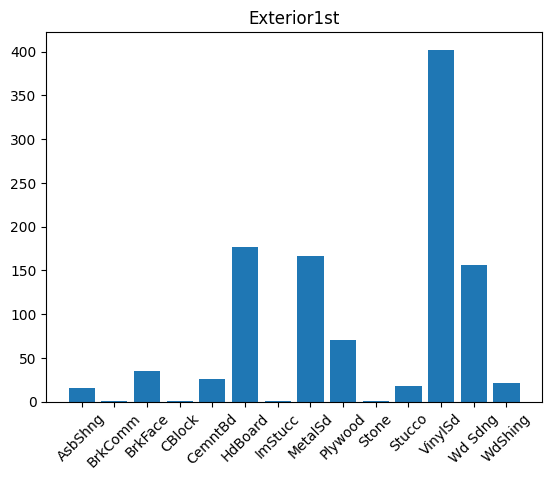

Exterior1st
.<-----------------------------value counts-------------------------------->
VinylSd    0.368132
HdBoard    0.162088
MetalSd    0.152015
Wd Sdng    0.142857
Plywood    0.065018
BrkFace    0.032051
CemntBd    0.023810
WdShing    0.019231
Stucco     0.016484
AsbShng    0.014652
BrkComm    0.000916
Stone      0.000916
ImStucc    0.000916
CBlock     0.000916
Name: Exterior1st, dtype: float64
`<------------------------------------------------------------------------->





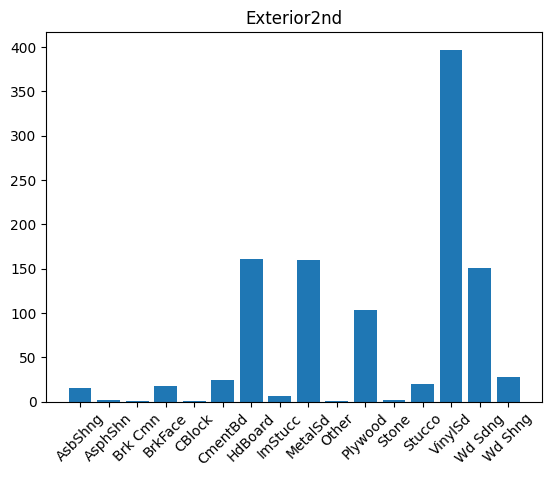

Exterior2nd
.<-----------------------------value counts-------------------------------->
VinylSd    0.363553
HdBoard    0.147436
MetalSd    0.146520
Wd Sdng    0.138278
Plywood    0.094322
Wd Shng    0.025641
CmentBd    0.022894
Stucco     0.018315
BrkFace    0.016484
AsbShng    0.014652
ImStucc    0.005495
AsphShn    0.001832
Stone      0.001832
Brk Cmn    0.000916
Other      0.000916
CBlock     0.000916
Name: Exterior2nd, dtype: float64
`<------------------------------------------------------------------------->





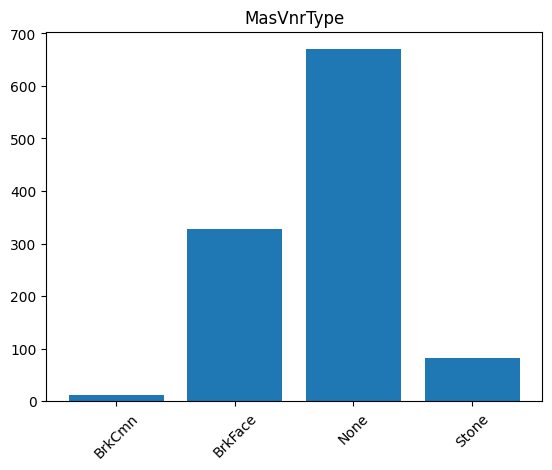

MasVnrType
.<-----------------------------value counts-------------------------------->
None       0.613553
BrkFace    0.299451
Stone      0.076007
BrkCmn     0.010989
Name: MasVnrType, dtype: float64
`<------------------------------------------------------------------------->





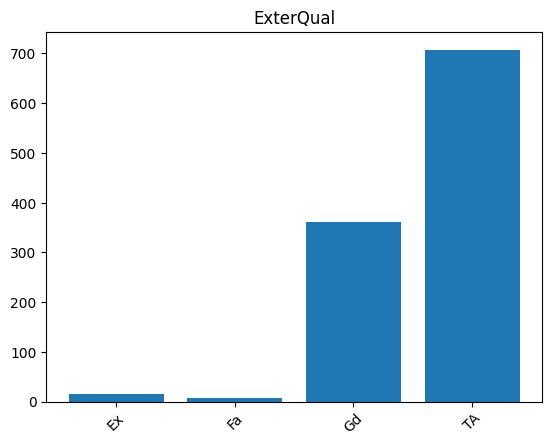

ExterQual
.<-----------------------------value counts-------------------------------->
TA    0.648352
Gd    0.330586
Ex    0.013736
Fa    0.007326
Name: ExterQual, dtype: float64
`<------------------------------------------------------------------------->





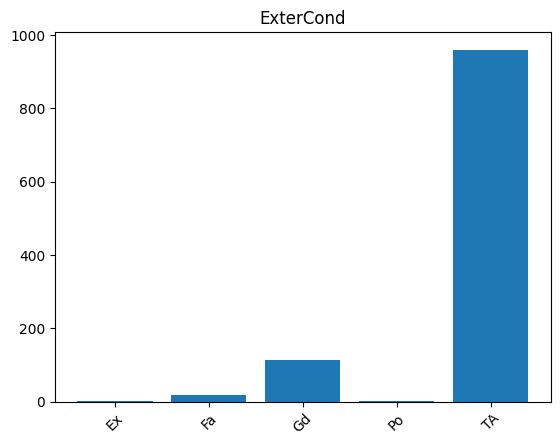

ExterCond
.<-----------------------------value counts-------------------------------->
TA    0.879121
Gd    0.103480
Fa    0.015568
Po    0.000916
Ex    0.000916
Name: ExterCond, dtype: float64
`<------------------------------------------------------------------------->





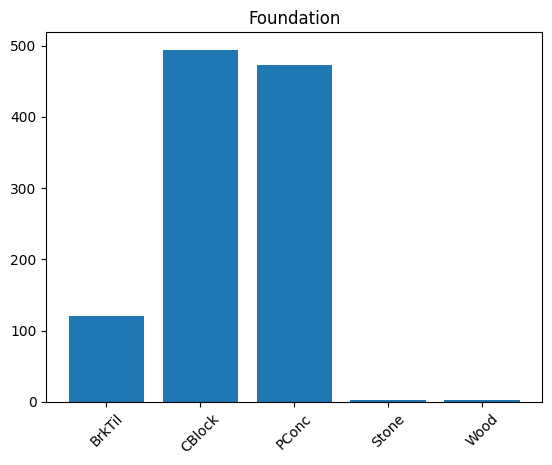

Foundation
.<-----------------------------value counts-------------------------------->
CBlock    0.452381
PConc     0.432234
BrkTil    0.109890
Wood      0.002747
Stone     0.002747
Name: Foundation, dtype: float64
`<------------------------------------------------------------------------->





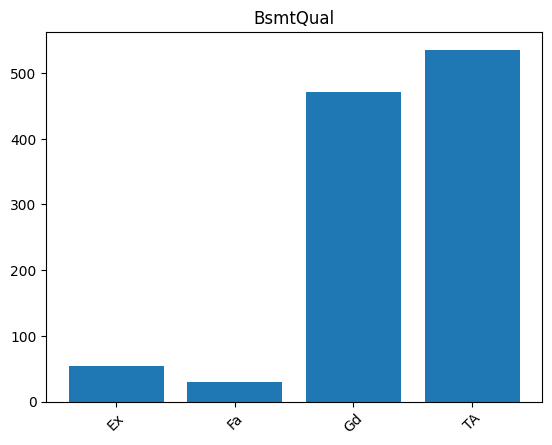

BsmtQual
.<-----------------------------value counts-------------------------------->
TA    0.490842
Gd    0.432234
Ex    0.049451
Fa    0.027473
Name: BsmtQual, dtype: float64
`<------------------------------------------------------------------------->





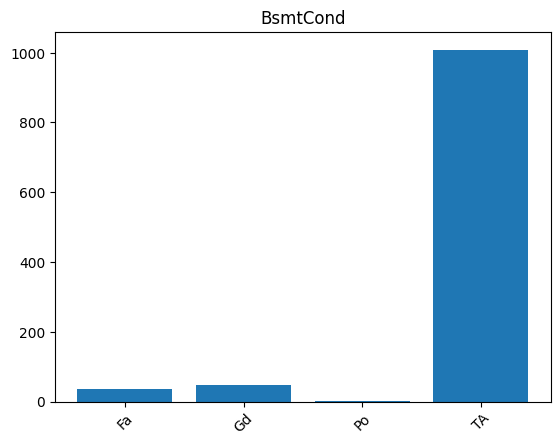

BsmtCond
.<-----------------------------value counts-------------------------------->
TA    0.923993
Gd    0.043040
Fa    0.032051
Po    0.000916
Name: BsmtCond, dtype: float64
`<------------------------------------------------------------------------->





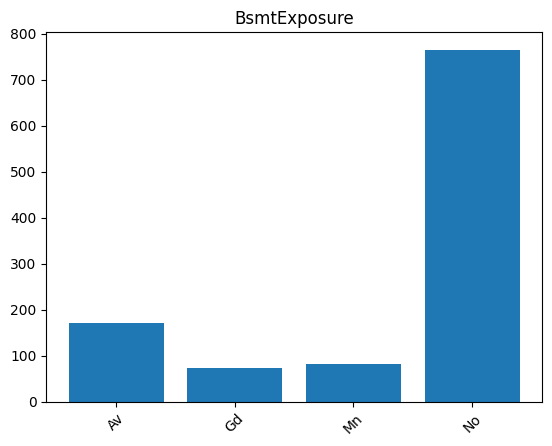

BsmtExposure
.<-----------------------------value counts-------------------------------->
No    0.700549
Av    0.157509
Mn    0.074176
Gd    0.067766
Name: BsmtExposure, dtype: float64
`<------------------------------------------------------------------------->





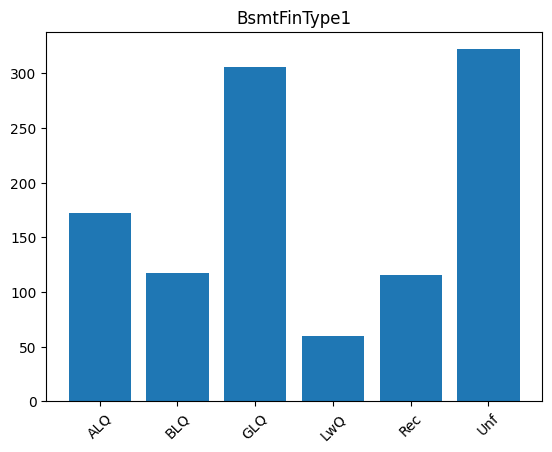

BsmtFinType1
.<-----------------------------value counts-------------------------------->
Unf    0.294872
GLQ    0.280220
ALQ    0.157509
BLQ    0.107143
Rec    0.105311
LwQ    0.054945
Name: BsmtFinType1, dtype: float64
`<------------------------------------------------------------------------->





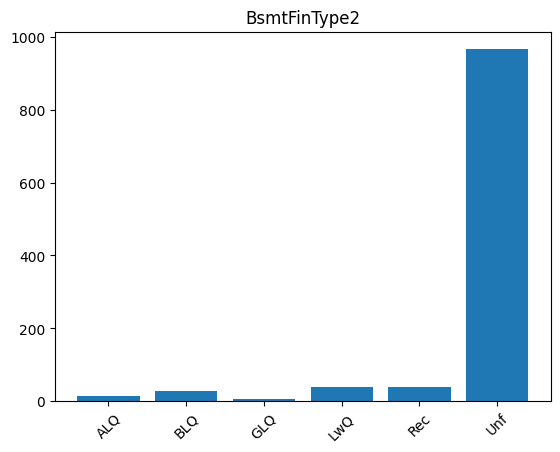

BsmtFinType2
.<-----------------------------value counts-------------------------------->
Unf    0.884615
Rec    0.035714
LwQ    0.034799
BLQ    0.024725
ALQ    0.013736
GLQ    0.006410
Name: BsmtFinType2, dtype: float64
`<------------------------------------------------------------------------->





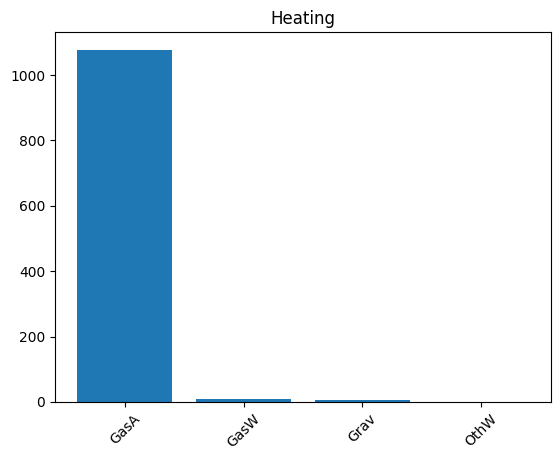

Heating
.<-----------------------------value counts-------------------------------->
GasA    0.986264
GasW    0.007326
Grav    0.005495
OthW    0.000916
Name: Heating, dtype: float64
`<------------------------------------------------------------------------->





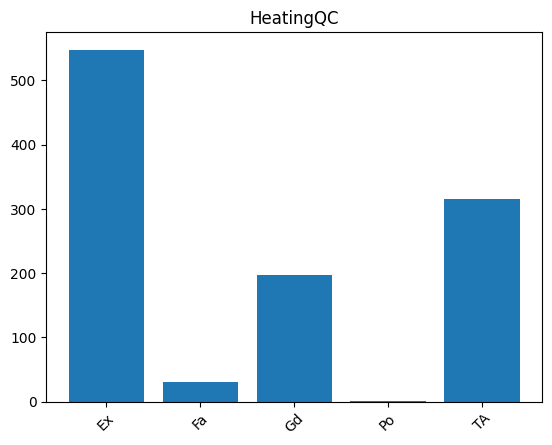

HeatingQC
.<-----------------------------value counts-------------------------------->
Ex    0.501832
TA    0.288462
Gd    0.180403
Fa    0.028388
Po    0.000916
Name: HeatingQC, dtype: float64
`<------------------------------------------------------------------------->





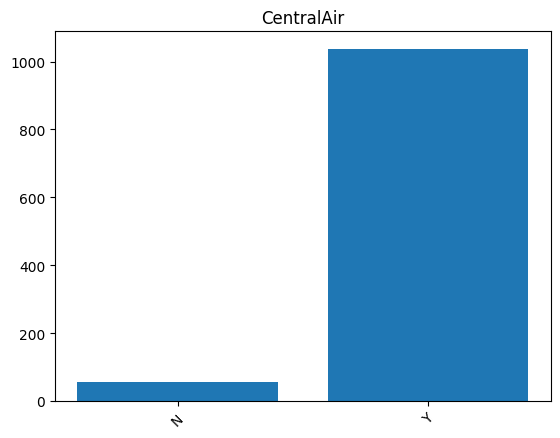

CentralAir
.<-----------------------------value counts-------------------------------->
Y    0.949634
N    0.050366
Name: CentralAir, dtype: float64
`<------------------------------------------------------------------------->





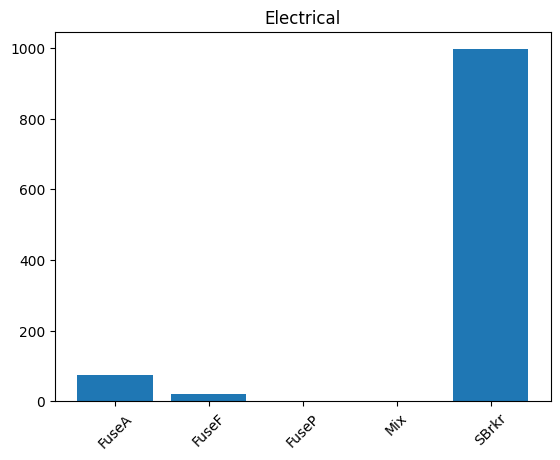

Electrical
.<-----------------------------value counts-------------------------------->
SBrkr    0.912088
FuseA    0.067766
FuseF    0.018315
FuseP    0.000916
Mix      0.000916
Name: Electrical, dtype: float64
`<------------------------------------------------------------------------->





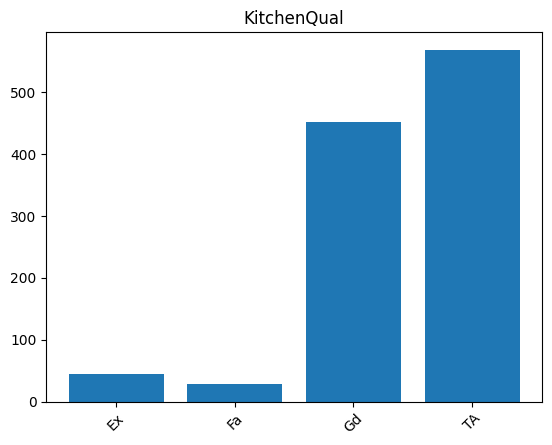

KitchenQual
.<-----------------------------value counts-------------------------------->
TA    0.520147
Gd    0.413004
Ex    0.041209
Fa    0.025641
Name: KitchenQual, dtype: float64
`<------------------------------------------------------------------------->





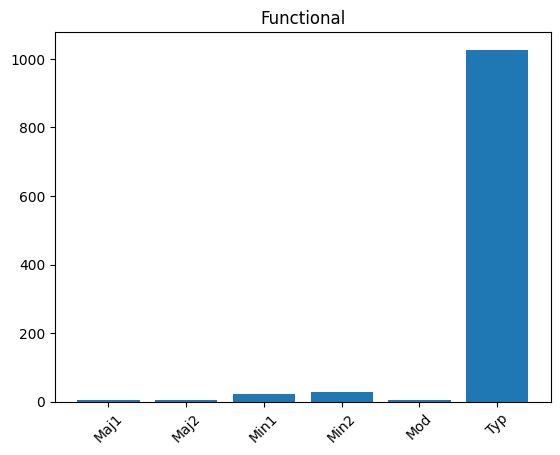

Functional
.<-----------------------------value counts-------------------------------->
Typ     0.940476
Min2    0.024725
Min1    0.019231
Maj1    0.005495
Mod     0.005495
Maj2    0.004579
Name: Functional, dtype: float64
`<------------------------------------------------------------------------->





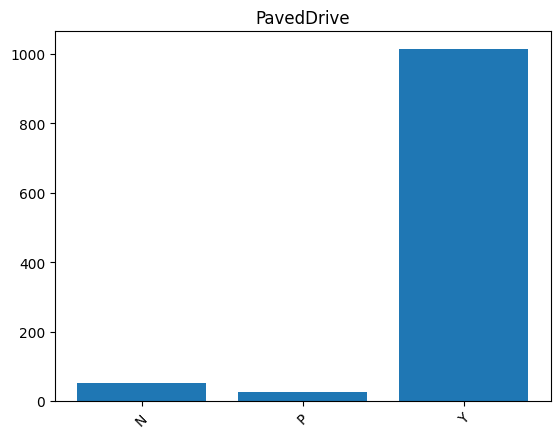

PavedDrive
.<-----------------------------value counts-------------------------------->
Y    0.928571
N    0.048535
P    0.022894
Name: PavedDrive, dtype: float64
`<------------------------------------------------------------------------->





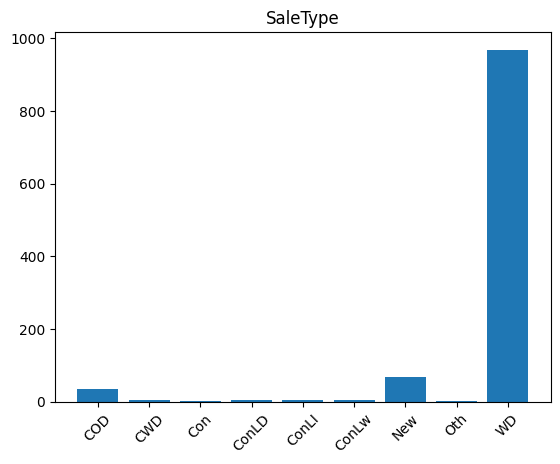

SaleType
.<-----------------------------value counts-------------------------------->
WD       0.886447
New      0.062271
COD      0.031136
ConLw    0.004579
ConLD    0.003663
ConLI    0.003663
CWD      0.003663
Oth      0.002747
Con      0.001832
Name: SaleType, dtype: float64
`<------------------------------------------------------------------------->





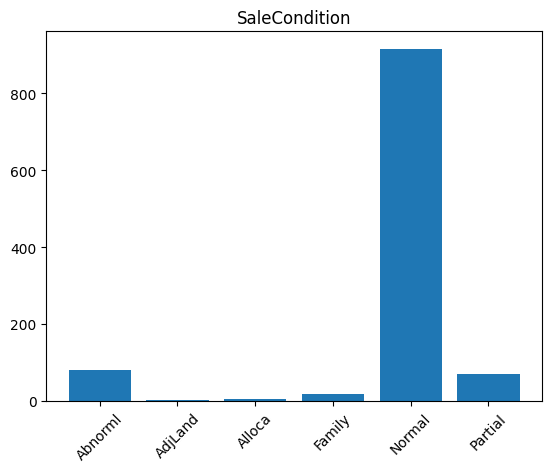

SaleCondition
.<-----------------------------value counts-------------------------------->
Normal     0.837912
Abnorml    0.073260
Partial    0.064103
Family     0.016484
Alloca     0.005495
AdjLand    0.002747
Name: SaleCondition, dtype: float64
`<------------------------------------------------------------------------->





In [23]:
features_with_dominant_categories = []
for col in categorica_df.columns:
    plot_data = categorica_df.groupby(by=col).count().iloc[:,1]
    
    plt.bar(x=plot_data.index,height=plot_data.values)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"{col}")
    print(".<-----------------------------value counts-------------------------------->")
 
    #lets get the features having dominant categories
    #lets remove the column having a category dominated by more than 80 percentage (random selection)
    value_counts_fractions = categorica_df[col].value_counts(normalize=True)
    print(value_counts_fractions)
    if max(value_counts_fractions.values) >= 0.8 :
        features_with_dominant_categories.append(col)
        
    print("`<------------------------------------------------------------------------->")
    print("\n\n")
    

features_with_dominant_categories
categorica_df = categorica_df.drop(features_with_dominant_categories, axis=1)
train_df = train_df.drop(features_with_dominant_categories,axis=1)



In [24]:
print(categorica_df.shape)
print(train_df.shape)


(1092, 14)
(1092, 31)


In [25]:
train_df.head()

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
0,60.0,8450.0,Reg,Inside,CollgCr,2Story,7.0,2003.0,2003,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,Ex,856.0,1710.0,Gd,8.0,0.0,548.0,61.0,2,2008,208500.0
1,20.0,9600.0,Reg,FR2,Veenker,1Story,6.0,1976.0,1976,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,Ex,1262.0,1262.0,TA,6.0,1.0,460.0,0.0,5,2007,181500.0
2,60.0,11250.0,IR1,Inside,CollgCr,2Story,7.0,2001.0,2002,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,Ex,920.0,1786.0,Gd,6.0,1.0,608.0,42.0,9,2008,223500.0
3,70.0,9550.0,IR1,Corner,Crawfor,2Story,7.0,1915.0,1970,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,Gd,961.0,1717.0,Gd,7.0,1.0,642.0,35.0,2,2006,140000.0
4,60.0,14260.0,IR1,FR2,NoRidge,2Story,8.0,2000.0,2000,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,Ex,1145.0,2198.0,Gd,9.0,1.0,836.0,84.0,12,2008,250000.0


# Feature Engineering

### *1. Lets split the data*

In [26]:
input_features = train_df.drop(target_column,axis=1)
target = train_df[[target_column]]

X_train, X_valid, y_train, y_valid=train_test_split(input_features,target,test_size=0.2,random_state=10)

# final features after cleaning for test_df
final_features = list(X_train.columns)
final_features.append(unique_Id_column)
test_df = test_df[final_features] 
# here we also retaining the Id column in Test_df, later during alignment it will be gone anyway.
test_df

,MSSubClass,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,MoSold,YrSold,Id
0,20,11622,Reg,Inside,NAmes,1Story,5,1961,1961,VinylSd,VinylSd,None,TA,CBlock,TA,No,Rec,468.0,270.0,882.0,TA,896,896,TA,5,0,730.0,0,6,2010,1461
1,20,14267,IR1,Corner,NAmes,1Story,6,1958,1958,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,TA,No,ALQ,923.0,406.0,1329.0,TA,1329,1329,Gd,6,0,312.0,36,6,2010,1462
2,60,13830,IR1,Inside,Gilbert,2Story,5,1997,1998,VinylSd,VinylSd,None,TA,PConc,Gd,No,GLQ,791.0,137.0,928.0,Gd,928,1629,TA,6,1,482.0,34,3,2010,1463
3,60,9978,IR1,Inside,Gilbert,2Story,6,1998,1998,VinylSd,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,602.0,324.0,926.0,Ex,926,1604,Gd,7,1,470.0,36,6,2010,1464
4,120,5005,IR1,Inside,StoneBr,1Story,8,1992,1992,HdBoard,HdBoard,None,Gd,PConc,Gd,No,ALQ,263.0,1017.0,1280.0,Ex,1280,1280,Gd,5,0,506.0,82,1,2010,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Reg,Inside,MeadowV,2Story,4,1970,1970,CemntBd,CmentBd,None,TA,CBlock,TA,No,Unf,0.0,546.0,546.0,Gd,546,1092,TA,5,0,0.0,0,6,2006,2915
1455,160,1894,Reg,Inside,MeadowV,2Story,4,1970,1970,CemntBd,CmentBd,None,TA,CBlock,TA,No,Rec,252.0,294.0,546.0,TA,546,1092,TA,6,0,286.0,24,4,2006,2916
1456,20,20000,Reg,Inside,Mitchel,1Story,5,1960,1996,VinylSd,VinylSd,None,TA,CBlock,TA,No,ALQ,1224.0,0.0,1224.0,Ex,1224,1224,TA,7,1,576.0,0,9,2006,2917
1457,85,10441,Reg,Inside,Mitchel,SFoyer,5,1992,1992,HdBoard,Wd Shng,None,TA,PConc,Gd,Av,GLQ,337.0,575.0,912.0,TA,970,970,TA,6,0,0.0,32,7,2006,2918


In [27]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(873, 30) (219, 30) (873, 1) (219, 1)


### *2. Encoding Categorical columns*

In [28]:
categorical_columns = X_train.select_dtypes(include=object).columns
# categorical_columns = np.asarray(categorical_columns).reshape(1,-1)
categorical_columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual'],
      dtype='object')

In [29]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)

#let's apply get_dummies on X_validation data and Test_df 
X_valid_encoded = pd.get_dummies(X_valid, columns=categorical_columns)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_columns)

# since validation and test_df might be missing some categories, they end up having different no of columns
# we can aligh the data columns with x_train_encoded so that, missing category column will be added with 0 as values, also
# unseen category if comes it will be ignored.

X_valid_encoded_aligned, _ = X_valid_encoded.align(X_train_encoded, join="right", fill_value=0, axis=1)


test_df_encoded_aligned, _ = test_df_encoded.align(X_train_encoded, join="right", fill_value=0, axis=1)



In [30]:
# checking if test_df column are aligned with train_df columns
set(test_df_encoded_aligned).difference(set(X_train_encoded))

set()

### *3. Scaling/Normalizing the features*

In [31]:
scaler = MinMaxScaler()

# fit and transoform on train data
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)

# only performing transform on validation and test data
X_valid_normalized = pd.DataFrame(scaler.transform(X_valid_encoded_aligned), columns=X_valid_encoded_aligned.columns) 
test_df_normalized = pd.DataFrame(scaler.transform(test_df_encoded_aligned), columns=test_df_encoded_aligned.columns) 

# Model Building

### *1. Linear Regression*
* Trying simpple linear regression
* Then going for advanced regression methods

In [32]:
linear_model = LinearRegression()
linear_model.fit(X_train_normalized, y_train)

LinearRegression()

*model metrics*

In [33]:
# training score

train_r2 = linear_model.score(X_train_normalized,y_train)
print("train R2 score: ",train_r2)

train_adj_R2 = 1 - (1-train_r2)*(len(y_train)-1)/(len(y_train)-X_train_normalized.shape[1]-1)
print("train adjusted R2 score: ", train_adj_R2)

train R2 score:  0.9216983410839712
train adjusted R2 score:  0.9089612712336306


In [34]:
# validation  score

valid_r2 = linear_model.score(X_valid_normalized,y_valid)
print("train R2 score: ",valid_r2)

valid_adj_R2 = 1 - (1-valid_r2)*(len(y_valid)-1)/(len(y_valid)-X_valid_normalized.shape[1]-1)
print("train adjusted R2 score: ", valid_adj_R2)

train R2 score:  -1.806073055423641e+20
train adjusted R2 score:  -4.101290896691185e+20


### *2. Random Forest Regressor*
* Trying with stadard parms
* Later tune h-parms using gridsearch cv

In [35]:
random_forest_reg = RandomForestRegressor(n_estimators=180)

In [36]:
random_forest_reg.fit(X_train_normalized, y_train.values.reshape(-1,))

RandomForestRegressor(n_estimators=180)

In [37]:
# Training Score
RF_train_score = random_forest_reg.score(X_train_normalized, y_train)
RF_train_score

0.9816477866320723

In [38]:
# Validation Score
RF_validation_score = random_forest_reg.score(X_valid_normalized, y_valid)
RF_validation_score

0.8903495951264455

Random Forest Regressor is overfitted, but result is very good compared to simple learn regression
* We can fine tune Hyperparameters like n-estimators, min_sample_split, min_sample_leaf
* Best parms can be calculated using grid search cv

# Predicting Test Data

In this version of the notebook, It only has model without fine tuning.

In [39]:
# Lets have a look at sample submision file
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [40]:
test_predictions = random_forest_reg.predict(test_df_normalized)
test_predictions.shape

(1459,)

In [41]:
test_predictions_df = pd.DataFrame(test_predictions, columns=[target_column])
final_submission = pd.concat([test_df,test_predictions_df],axis=1)

final_submission = final_submission[[unique_Id_column,target_column]]
final_submission.to_csv(r"/kaggle/working/submission.csv",index=False)
final_submission.head(25)

,Id,SalePrice
0,1461,127490.222222
1,1462,152352.216667
2,1463,177902.661111
3,1464,181116.177778
4,1465,195537.311111
5,1466,177044.400000
6,1467,160024.038889
7,1468,175707.100000
8,1469,177974.966667
9,1470,125692.700000
